# QUESTION 1

In [1]:
# Datetine range
import csv, time,datetime
fn = 'trip_data_3.csv'
f = open(fn,'r')
reader = csv.reader(f)
n=0
mindate = None
maxdate = None

for i, row in enumerate(reader):
    if i==0:continue  #Skip header
    n += 1 # row count
    dts = row[5].split()[0]
    dto = None
    try:
        dto = datetime.datetime.strptime(dts, "%Y-%m-%d")
    except Exception as e:
        print(e)
    if dto is not None:
        if i == 1:
            mindate = dto
            maxdate = dto
        elif dto < mindate:
            mindate = dto
        elif dto > maxdate:
            maxdate = dto
print('Datetime Range:', mindate,' to ', maxdate, '\nNumber of Rows:', n)
f.close()

Datetime Range: 2013-03-01 00:00:00  to  2013-03-31 00:00:00 
Number of Rows: 15749228


# QUESTION 2

In [2]:
#Field names
import csv, time,datetime
fn = 'trip_data_3.csv'
f = open(fn,'r')
reader = csv.reader(f)

ss = 'Field Names | Description\n------ | ------\n'
for row in reader:
    for field in row:
        ss+=field+'|-\n'
    break
print(ss)
f.close()

Field Names | Description
------ | ------
medallion|-
 hack_license|-
 vendor_id|-
 rate_code|-
 store_and_fwd_flag|-
 pickup_datetime|-
 dropoff_datetime|-
 passenger_count|-
 trip_time_in_secs|-
 trip_distance|-
 pickup_longitude|-
 pickup_latitude|-
 dropoff_longitude|-
 dropoff_latitude|-



# QUESTION 3

In [23]:
#Field names
import csv, time,datetime
fn = 'trip_data_3.csv'
f = open(fn,'r')
reader = csv.reader(f)
dic =  []
ss = 'Field Names | Sample Data\n-- | --\n'
for i, row in enumerate(reader):
    if i==0:
        dic=row
    if i==1:
        for e in range(len(dic)):
            ss+=dic[e]+'|'+row[e]+'\n'
        break
print(ss)
f.close()

Field Names | Sample Data
-- | --
medallion|FE7B354FEB67B9C94BD34EA54469691C
 hack_license|2C78614ADC9C602EC70D65CCB4E63B14
 vendor_id|CMT
 rate_code|1
 store_and_fwd_flag|N
 pickup_datetime|2013-03-01 00:00:04
 dropoff_datetime|2013-03-01 00:19:03
 passenger_count|1
 trip_time_in_secs|1138
 trip_distance|14.30
 pickup_longitude|-73.776703
 pickup_latitude|40.645164
 dropoff_longitude|-73.913925
 dropoff_latitude|40.772614



# QUESTION 4

In [4]:
import csv, time,datetime

def getCount(e):
    i,max_len, dec_len=0,0,0
    f = open(fn,'r')
    reader = csv.reader(f)
    for row in reader:
        i+=1
        if i==1:continue
        if '.' in row[e]:
            val1=len(str(float(row[e])).replace('.','').replace('-','')) #before the decimal point
            val2=len(str(float(row[e])).split('.')[1]) # after the decimal point
            if max_len < val1:
                max_len=val1
            if dec_len < val2:
                dec_len=val2
    return '('+str(max_len)+','+str(dec_len)+')'

def getCount2(e,d_type):
    i, max_len=0,0
    f = open(fn,'r')
    reader = csv.reader(f)
    for row in reader:
        i+=1
        if i==1:continue
        if d_type=='int':
            val=len(row[e].replace('-',''))
            if max_len < val:
                max_len = val
        elif d_type=='var':
            val=len(row[e])
            if max_len < val:
                max_len = val
    return '('+str(max_len)+')'


fn = 'trip_data_3.csv'
f = open(fn,'r')
reader = csv.reader(f)
field_names=[]
d_type=''
for i, row in enumerate(reader):
    if i==2:break
    if i==0:
        field_names=row
        continue
    ss = 'Field Names | Sample Data\n------ | ------\n'
    if i==1:
        for e in range(len(row)):
            try:
                dto = datetime.datetime.strptime(row[e].replace(' ',':'), "%Y-%m-%d:%H:%M:%S")
                d_type='datetime'
            except Exception as k:
                if '.' in row[e]: # is decimal
                    count = getCount(e)
                    d_type='decimal'+count
                else:
                    try:
                        val=int(row[e])
                        count = getCount2(e,'int')
                        d_type='int'+count
                    except Exception as k:
                        count = getCount2(e,'var')
                        d_type='varchar'+count
            ss+=field_names[e]+'|'+d_type+'\n'
print(ss)
f.close()

Field Names | Sample Data
------ | ------
medallion|varchar(32)
 hack_license|varchar(32)
 vendor_id|varchar(3)
 rate_code|int(3)
 store_and_fwd_flag|varchar(1)
 pickup_datetime|datetime
 dropoff_datetime|datetime
 passenger_count|int(3)
 trip_time_in_secs|int(5)
 trip_distance|decimal(4,2)
 pickup_longitude|decimal(12,11)
 pickup_latitude|decimal(11,10)
 dropoff_longitude|decimal(12,11)
 dropoff_latitude|decimal(11,10)



# QUESTION 5

In [5]:
# 5.	What is the geographic range of your data (min/max - X/Y)?
# a.	Plot this (approximately on a map)

import csv, time,datetime
fn = 'trip_data_3.csv'
ss = 'Coordinate | Min | Max | Range\n----- | --- | --- | ---\n'
min_lon, min_lat, max_lon, max_lat=100.0,100.0,-180,0.0

i, min_, max_=0,100,0
f = open(fn,'r')
reader = csv.reader(f)
for row in reader:
    i+=1
    if i==1:continue
    val1=float(row[10])
    val2=float(row[11])
    #validate
    if not float(-79.7624)<=val1<=float(-71.7517): continue
    if not float(40.4772)<=val2<=float(45.0153): continue
#         "min_lat": 40.4772,
#     "max_lat": 45.0153,
#     "min_lng": -79.7624,
#     "max_lng": -71.7517
        
    if min_lon > val1:
        min_lon=val1
#         print('min lon', row[10],row[11])
    if max_lon < val1:
        max_lon=val1
#         print('max lon', row[10],row[11])
    if min_lat > val2:
        min_lat=val2
#         print('min lat', row[10],row[11])
    if max_lat < val2:
        max_lat=val2
#         print('max lat', row[10],row[11])
ss+='Longitude|'+str(min_lon)+'|'+str(max_lon)+'|'+str(max_lon-min_lon)+'\n'
ss+='Latitude|'+str(min_lat)+'|'+str(max_lat)+'|'+str(max_lat-min_lat)+'\n'
f.close()
print(ss)

Coordinate | Min | Max | Range
----- | --- | --- | ---
Longitude|-79.73333|-71.800003|7.933326999999991
Latitude|40.477325|44.983334|4.506008999999999



# QUESTION 6

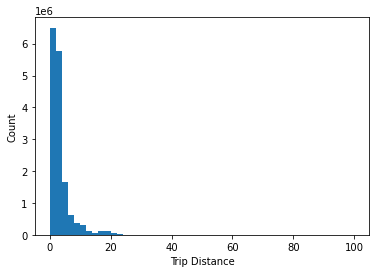

Average Trip Distance 2.8414825431450907


In [24]:
import csv, time,datetime
import matplotlib.pyplot as plt
fn = 'trip_data_3.csv'
f = open(fn,'r')
reader = csv.reader(f)
x,y=[],[]
for i, row in enumerate(reader):
    if i==0:continue
    x.append(round(float(row[9])))
    y.append(float(row[9]))
plt.hist(x, density=False, bins=50)
plt.ylabel('Count')
plt.xlabel('Trip Distance')
plt.show()

avg = sum(y)/len(y)
print('Average Trip Distance', avg)
f.close()

# QUESTION 8

In [30]:
import csv, time,datetime
fn = 'trip_data_3.csv'
ss = 'Field Names | Min | Max | Comments\n----- | --- | ---|--\n'
for pos in [3,7,8,]:
    f_n=''
    i, min_, max_=0,100,0
    f = open(fn,'r')
    reader = csv.reader(f)
    for row in reader:
        i+=1
        if i==1:
            f_n=row[pos]
            continue
        val=int(row[pos])
        if min_ > val:
            min_=val
        if max_ < val:
            if pos==7:
                if val<=9:
                    max_=val
            else:
                max_=val    
    ss+=f_n+'|'+str(min_)+'|'+str(max_)+'|-\n'
    f.close()
print(ss)

Field Names | Min | Max | Comments
----- | --- | ---|--
 rate_code|0|210|-
 passenger_count|0|9|-
 trip_time_in_secs|0|10800|-



# QUESTION 9

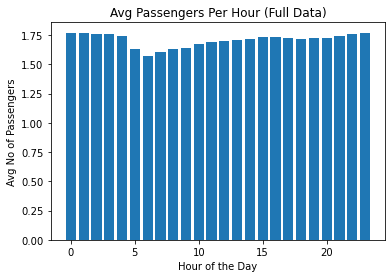

In [34]:
import csv, time,datetime
import matplotlib.pyplot as plt
fn = 'trip_data_3.csv'
f = open(fn,'r')
reader = csv.reader(f)
hrhist={}
x,y=[],[]

for i, row in enumerate(reader):
    if i==0:continue  #Skip header
    hr = int(row[5].split()[1].split(':')[0])
    pass_count=int(row[7])
    if hr in hrhist:
        hrhist[hr].append(pass_count)
    else:
        hrhist[hr]=[pass_count]
#         print('first',hrhist)
for k,v in hrhist.items():
    x.append(k)
    y.append(sum(v)/len(v))
plt.bar(x,y)
plt.ylabel('Avg No of Passengers')
plt.xlabel('Hour of the Day')
plt.title('Avg Passengers Per Hour (Full Data)')
plt.show()
f.close()

# QUESTION 10

In [33]:
import csv, time,datetime
fn = 'trip_data_3.csv'
f = open(fn,'r')
reader = csv.reader(f)

f2 = open('trip_data_3_subset.csv','w')
writer = csv.writer(f2,delimiter=',',lineterminator='\n')
for i, row in enumerate(reader):
    if i==0:
        writer.writerow(row) #Write field names
        continue
    if i%1000==0:
        writer.writerow(row)
f.close()
f2.close()

#Check max row of the subset data
fn = 'trip_data_3_subset.csv'
f = open(fn,'r')
n=0
reader = csv.reader(f)
for i, row in enumerate(reader):
    if i==0:continue # Skip the header row
    n+=1
print('The subset data has', n, 'rows')

The subset data has 15749 rows


# QUESTION 11

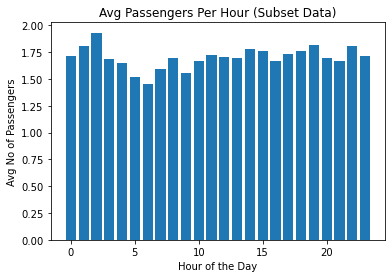

In [12]:
import csv, time,datetime
import matplotlib.pyplot as plt
fn = 'trip_data_3_subset.csv'
f = open(fn,'r')
reader = csv.reader(f)
hrhist={}
x,y=[],[]

for i, row in enumerate(reader):
    if i==0:continue  #Skip header
    hr = int(row[5].split()[1].split(':')[0])
    pass_count=int(row[7])
    if hr in hrhist:
        hrhist[hr].append(pass_count)
    else:
        hrhist[hr]=[pass_count]
#         print('first',hrhist)
for k,v in hrhist.items():
    x.append(k)
    y.append(sum(v)/len(v))
plt.bar(x,y)
plt.ylabel('Avg No of Passengers')
plt.xlabel('Hour of the Day')
plt.title('Avg Passengers Per Hour (Subset Data)')
plt.show()
f.close()

In [ ]:
# # a.	int(xx), varchar(xx),date,datetime,bool, decimal(m,d)
# import csv, time,datetime
# fn = 'trip_data_3.csv'
# f = open(fn,'r')
# reader = csv.reader(f)
# field_names=[]
# d_type=''
# for i, row in enumerate(reader):
#     if i==2:break
#     if i==0:
#         field_names=row
#         continue
#     ss = 'Field Names | Sample Data\n------ | ------\n'
#     if i==1:
#         for e in range(len(row)):
#             try:
#                 dto = datetime.datetime.strptime(row[e].replace(' ',':'), "%Y-%m-%d:%H:%M:%S")
#                 d_type='datetime'
#             except Exception as k:
# #                 print(k)
#                 if '.' in row[e]: # is decimal
#                     d_type='decimal'
# #                     d_type = 'decimal('+len(row[e],','+len(row[e].split('.')[1]))
#                 else:
#                     try:
#                         val=int(row[e])
#                         d_type='int'
#                     except Exception as k:
#                         d_type='varchar'
#             ss+=field_names[e]+'|'+d_type+'\n'
# print(ss)
                        
                    
                
# # n='4'
# # if isinstance(n, int):
# #     print('is int')
# # if isinstance(n, float):
# #     print('is decimal')

In [ ]:
# #Field names
# import csv, time,datetime
# fn = 'trip_data_3.csv'
# for pos in range(9,10):
#     i=0
#     max_len, dec_len=0,0
#     f = open(fn,'r')
#     reader = csv.reader(f)
#     for row in reader:
#         i+=1
#         if i==1:
#             print(row[pos])
#             continue
#         if '.' in row[pos]:
#             val1=len(str(row[pos]).replace('.','').replace('-','')) #before the decimal point
#             val2=len(str(row[pos]).split('.')[1]) # after the decimal point
#             if max_len < val1:
#                 print('int',str(row[pos]))
#                 max_len=val1
#             if dec_len < val2:
#                 print('dec',str(row[pos]))
#                 dec_len=val2
        
#     print(pos, '('+str(max_len)+','+str(dec_len)+')')

In [29]:
import csv, time,datetime
fn = 'trip_data_3.csv'
f = open(fn,'r')
n=0
d=[]
reader = csv.reader(f)
for i, row in enumerate(reader):
    if i==0:continue
    if int(row[3]) not in d:
        d.append(int(row[3]))
print(sorted(d))
#         print(row)
#         continue
#     if int(row[3])==0:
#         print(row)
#         break

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 17, 210]


In [ ]:
import csv, time,datetime
fn = 'trip_data_3.csv'
f = open(fn,'r')
n=0
d=[]
reader = csv.reader(f)
for i, row in enumerate(reader):
    if i==0:continue
    if int(row[7]) > 9:
        d.append(row[7])
print(d)
#         print(row)
#         continue
#     if int(row[3])==0:
#         print(row)
#         break